<a href="https://colab.research.google.com/github/RishabhG998/Applied-Machine-Learning/blob/main/Gold_Price_Prediction_using_XGBoost%2C_RandomForest_and_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning/Machine Learning with Python/gld_price_data.csv')

In [10]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [11]:
# Deleting the Date column
df = df.drop(columns =['Date'],axis=1)
df.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [12]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


In [14]:
df.size

11450

array([[<Axes: title={'center': 'SPX'}>, <Axes: title={'center': 'GLD'}>,
        <Axes: title={'center': 'USO'}>, <Axes: title={'center': 'SLV'}>,
        <Axes: title={'center': 'EUR/USD'}>]], dtype=object)

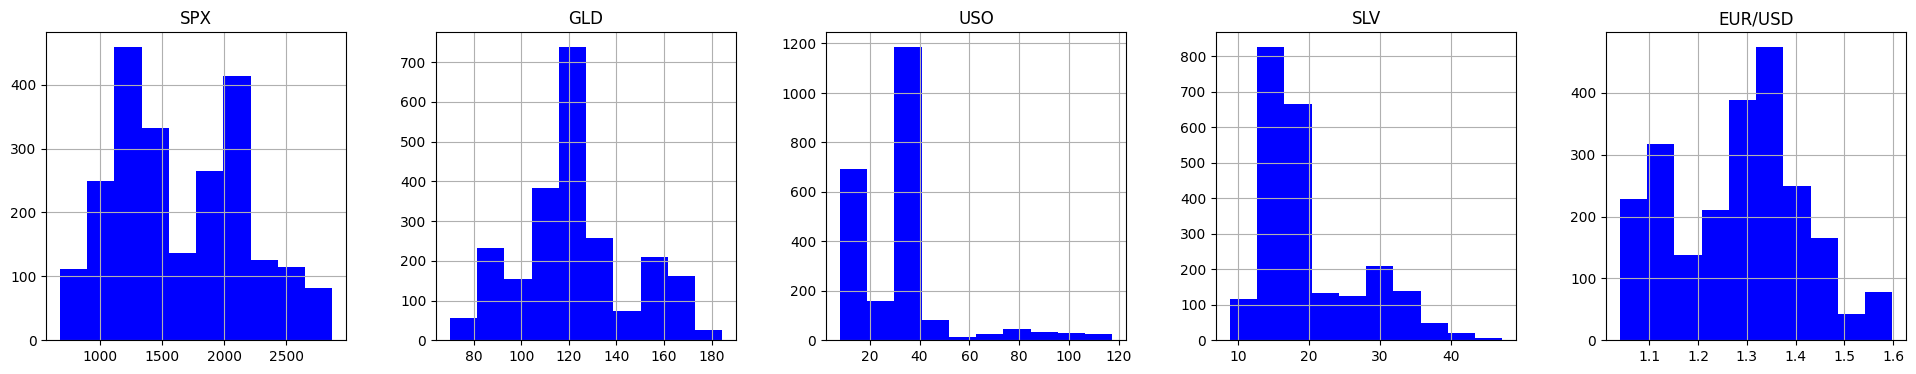

In [15]:
df.hist(figsize=(24,4) , layout=(1,5) , color='b')

<Axes: >

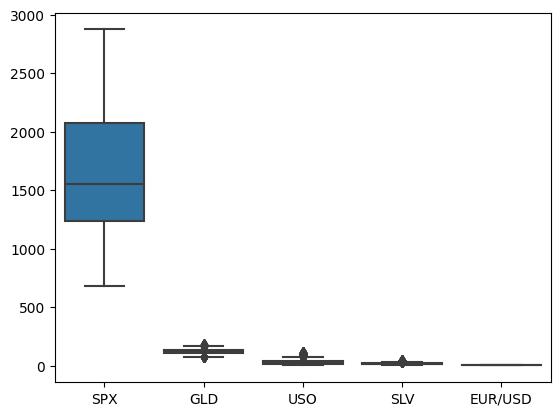

In [16]:
sns.boxplot(df)

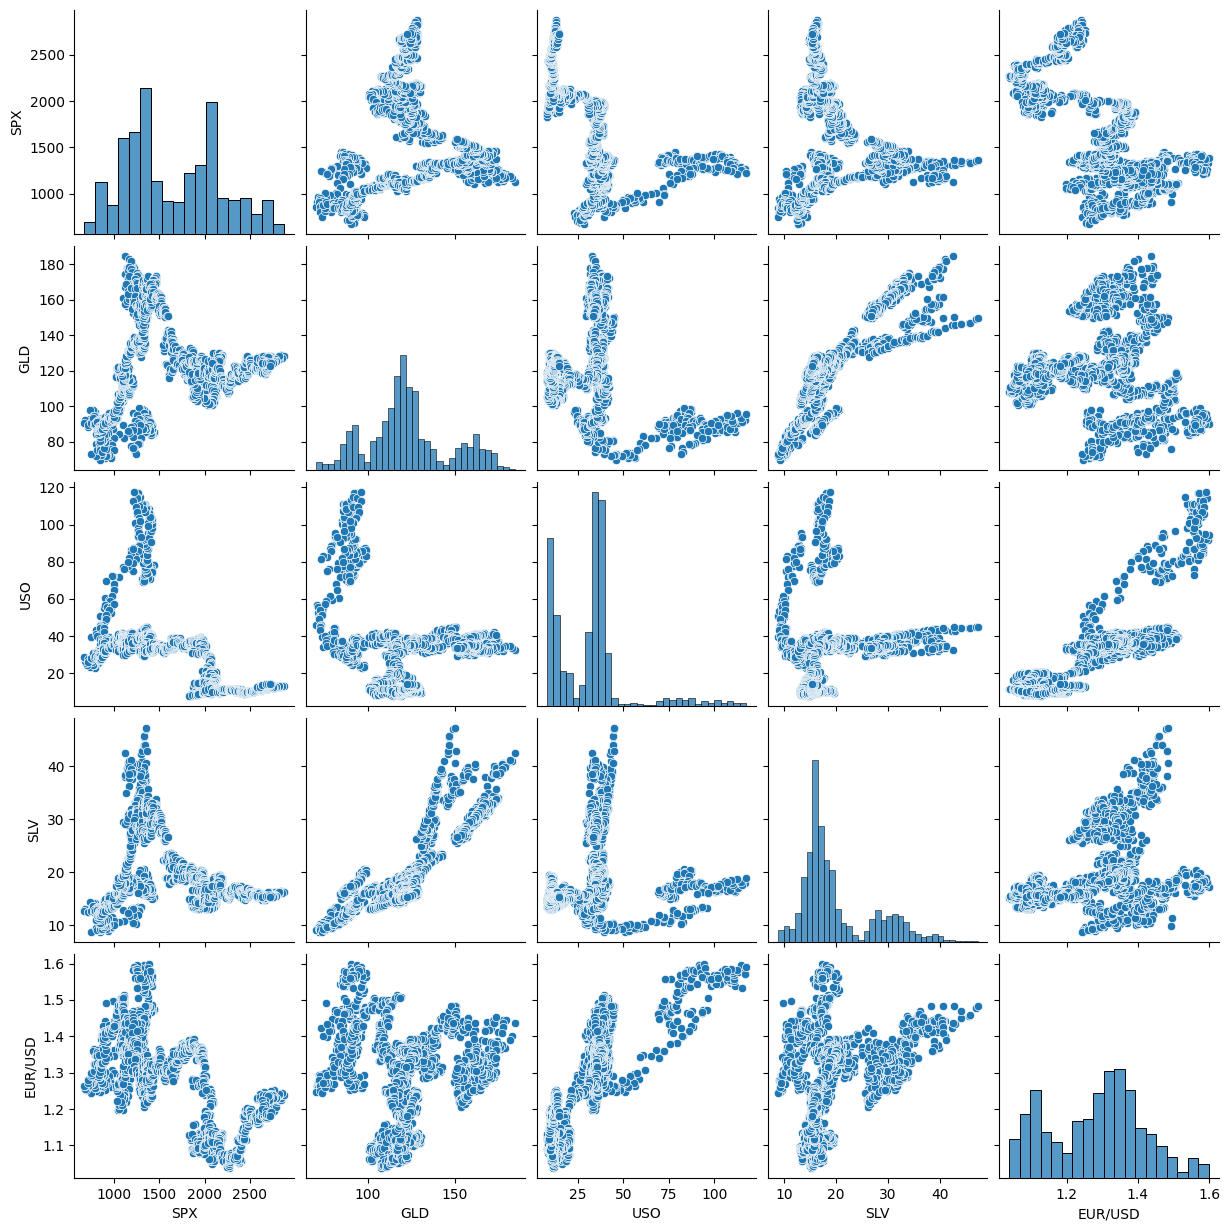

In [17]:
sns.pairplot(df)

In [18]:
df.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

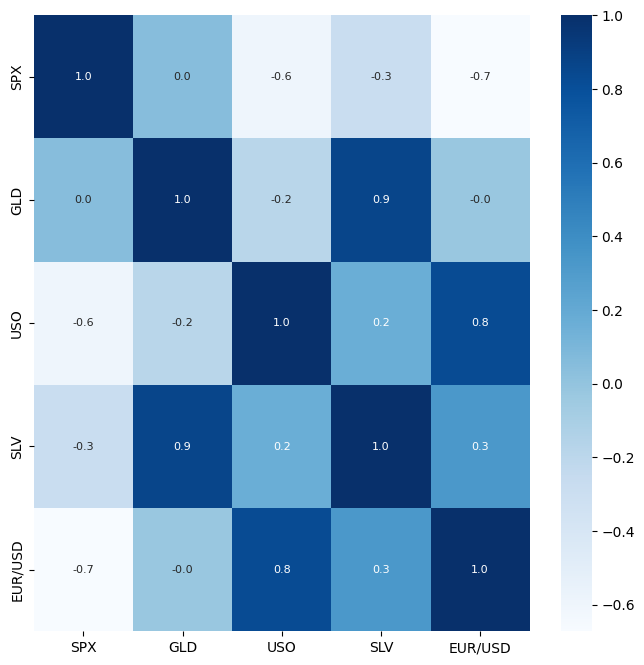

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr() , cbar=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

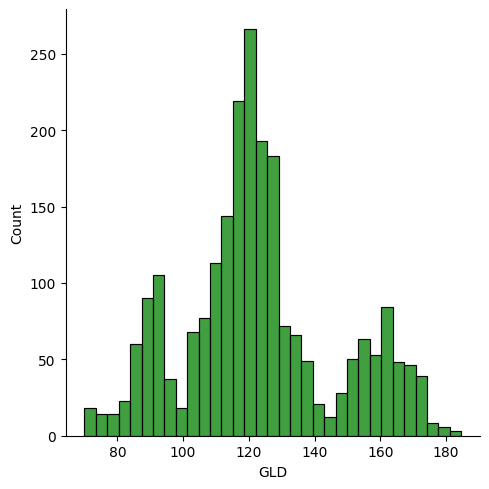

In [20]:
sns.displot(df['GLD'],color='green')

In [21]:
X = df.drop(columns=['GLD'],axis=1)
y = df['GLD']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train,y_train)
X_test_scaled  =scaler.transform(X_test)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor

In [25]:
# Random forest
rf = RandomForestRegressor()
rf.fit(X_train_scaled,y_train)
y_rf = rf.predict(X_test_scaled)

In [26]:
# Decision tree
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled,y_train)
y_dt = dt.predict(X_test_scaled)

In [27]:
# XGBoost
xgb = XGBRegressor()
xgb.fit(X_train_scaled,y_train)
y_xgb = xgb.predict(X_test_scaled)

In [28]:
from sklearn import metrics

In [29]:
rf_score = metrics.r2_score(y_test,y_rf)
print("Random forest : ", rf_score)

Random forest :  0.9899601949041853


In [30]:
dt_score = metrics.r2_score(y_test,y_dt)
print("Random forest : ", dt_score)

Random forest :  0.9812065583068005


In [31]:
xgb_score = metrics.r2_score(y_test,y_xgb)
print("Random forest : ", xgb_score)

Random forest :  0.9885715958139172


In [33]:
from sklearn.metrics import mean_absolute_error
print("MAE for Random Forest: ",mean_absolute_error(y_test,y_rf))
print("MAE for Decision Tree, ", mean_absolute_error(y_test,y_dt))
print("MAE for XGBoost, ", mean_absolute_error(y_test,y_xgb))

MAE for Random Forest:  1.2464714305021871
MAE for Decision Tree,  1.5482312860262006
MAE for XGBoost,  1.371212750236678


In [34]:
# Hyperparameter tuning using Grid Search

rf1 = RandomForestRegressor()

#Number of trees in random forest
n_estimators = [10,20,40,60,100,120]

#No. of features to consider at every split
max_features = [0.2,0.6,1.0]

#Maximum number of levels in tree
max_depth = [2,5,8,10,None]

#No. of samples
max_samples = [0.5,0.75,1.0]

In [35]:
param_grid = { 'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'max_samples' : max_samples
}

In [36]:
from sklearn.model_selection import GridSearchCV

rf1_grid = GridSearchCV(estimator = rf1,
                       param_grid = param_grid,
                       cv=5,
                       verbose =2,
                       n_jobs = -1)

In [37]:
rf1_grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [10, 20, 40, 60, 100, 120]},
             verbose=2)

In [38]:
rf1_grid.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 40}

In [39]:
rf1_grid.best_score_

0.9890766068566998

In [40]:
y_test = list(y_test)

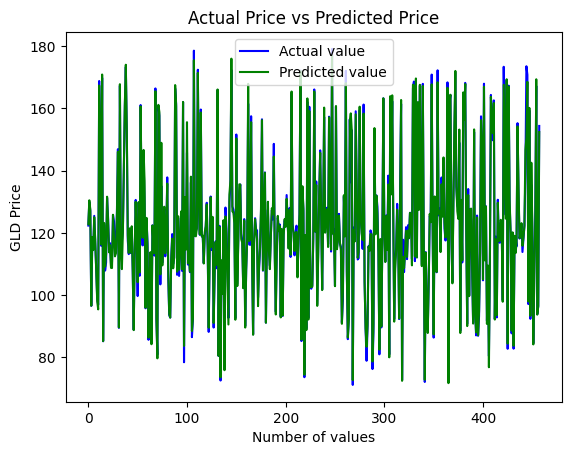

In [41]:
plt.plot(y_test , color='blue' , label='Actual value')
plt.plot(y_rf , color='green' , label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [49]:
df_2 = pd.DataFrame({'original':y_test,'pred':y_rf})
df_2['diff']=df_2.original - df_2.pred
df_2

,original,pred,diff
0,122.320000,122.753200,-0.433200
1,129.899994,130.445203,-0.545209
2,126.980003,127.552900,-0.572897
3,96.500000,96.541198,-0.041198
4,117.580002,118.653000,-1.072998
...,...,...,...
453,126.680000,123.593700,3.086300
454,167.179993,169.345197,-2.165204
455,93.849998,93.697199,0.152799
456,96.230003,96.578701,-0.348698


<Axes: >

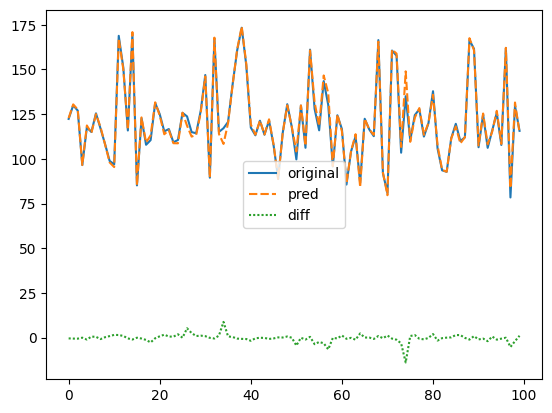

In [53]:
sns.lineplot(df_2[:100])